$\huge{\textbf{Dinamika HF1 megoldó}} - \huge{near731}$

In [205]:
#Imports

import numpy as np
import sympy as sp
import math
import matplotlib
import matplotlib.pyplot as plt
import sympy as sp
import math
from sympy import init_printing
import scipy.linalg as la
from sympy import *
from sympy import Matrix, symbols, solve_linear_system
from sympy.plotting import plot
from sympy.interactive import printing
from sympy.printing.latex import LatexPrinter, print_latex
printing.init_printing(use_latex=True)


$\Large{\textbf{Adatok:}}$

In [206]:
#Symbols

phi_1,phi_3,l_1,l_2,l_3,omega,omega2_z,omega3_z=sp.symbols("phi_1,phi_3,l_1,l_2,l_3,omega,omega2_z,omega3_z")

#Adatok

phi_1_adat=float(input("phi_1="))*np.pi/180 #fok
phi_3_adat=60*np.pi/180 #fok
l_1_adat=float(input("l_1=")) #m
l_2_adat=float(input("l_2=")) #m
l_3_adat=float(input("l_3=")) #m
omega_z=float(input("omega_z")) #1/s
omega_adat=sp.Matrix([0,0,omega_z]) #rad/s

data=[(phi_1,phi_1_adat),(phi_3,phi_3_adat),(l_1,l_1_adat),(l_2,l_2_adat),(l_3,l_3_adat),(omega,omega_adat)]

$\Large{\textbf{2.Feladatrész}}$




2.feladatrész

Helyvektorok:

r_AB=


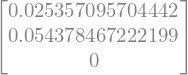

r_BC=


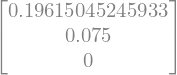

r_CD=


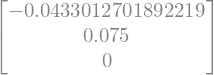

r_BS2=


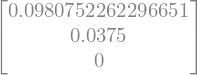

Sebességek:

v_B(m/s): 


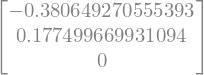


v_C(m/s):


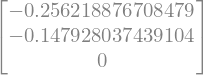

Szögsebességek:

omega_2(1/s):


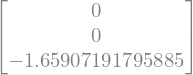


omega_3(1/s):


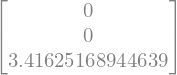


v_S2(m/s):


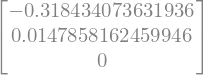

|v_S2|= 0.318777162939709 m/s


In [207]:
#2.feladatrész

print("2.feladatrész")

v_A=sp.Matrix([0,0,0])
v_D=sp.Matrix([0,0,0])

#Vectors

r_AB=sp.Matrix([(l_1_adat*np.cos(phi_1_adat)),(l_1_adat*np.sin(phi_1_adat)),0])

r_BC=sp.Matrix([(np.sqrt((l_2_adat)**2-(l_3_adat+l_3_adat*np.cos(phi_3_adat))**2)),
l_3_adat+l_3_adat*np.cos(phi_3_adat),0])

r_CD=sp.Matrix([-(l_3_adat*np.sin(phi_3_adat)),l_3_adat+l_3_adat*np.cos(phi_3_adat),0])

r_BS2=sp.Matrix([(np.sqrt((l_2_adat)**2-(l_3_adat+l_3_adat*np.cos(phi_3_adat))**2))/2,
((l_3_adat+l_3_adat*np.cos(phi_3_adat))/2),0])

print("\nHelyvektorok:")

print("\nr_AB=")
display(r_AB)
print("r_BC=")
display(r_BC)
print("r_CD=")
display(r_CD)
print("r_BS2=")
display(r_BS2)

#Velocity

print("Sebességek:")

omega_2=sp.Matrix([0,0,omega2_z])
omega_3=sp.Matrix([0,0,omega3_z])

v_B=sp.Matrix(v_A+omega_adat.cross(r_AB))
print("\nv_B(m/s): ")
display(v_B)

v_C1=sp.Matrix(v_B+omega_2.cross(r_BC))
v_C2=sp.Matrix(v_D+omega_3.cross(r_CD))

#print("\nv_C1=",v_C1,"m/s")
#print("\nv_C2=",v_C2,"m/s")

#Equations

ans=solve(v_C1-v_C2, [omega2_z,omega3_z])

#display(ans)

omega2_z=omega2_z.subs(ans)
omega3_z=omega3_z.subs(ans)

omega_2=omega_2.subs(ans)
omega_3=omega_3.subs(ans)

v_C=v_C1.subs(ans)

print("\nv_C(m/s):")
display(v_C)

print("Szögsebességek:")

print("\nomega_2(1/s):")
display(omega_2)

print("\nomega_3(1/s):")
display(omega_3)


v_S2=sp.Matrix(v_B+omega_2.cross(r_BS2))

print("\nv_S2(m/s):")
display(v_S2)

v_S2_abs=sp.sqrt(v_S2.dot(v_S2))
print("|v_S2|=",v_S2_abs,"m/s")

$\Large{\textbf{3.Feladatrész}}$

Sebesség pólus meghatározása:
r_AP:


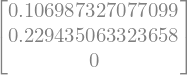

In [208]:
print("Sebesség pólus meghatározása:")

r_AP = (1/(omega_2.dot(omega_2.transpose())))*omega_2.cross(v_B)
print("r_AP:")
display(r_AP)
